In [207]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [471]:
interactiondata = pd.read_csv('interactiondata.csv', parse_dates=True)
interactiondata['last_order_dt'] = pd.to_datetime(interactiondata['last_order_dt'])
# interactiondata.head(5)
interactiondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3405 entries, 0 to 3404
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   UserId                         3405 non-null   object        
 1   complain_count                 3405 non-null   int64         
 2   last_order_dt                  3341 non-null   datetime64[ns]
 3   discount_purchases_count_avg   3405 non-null   int64         
 4   catalogue_purchases_count_avg  3405 non-null   int64         
 5   store_purchases_count_avg      3405 non-null   int64         
 6   website_purchases_count_avg    3405 non-null   int64         
 7   website_visit_count_avg        3405 non-null   int64         
 8   mobile_purchases_count_avg     3405 non-null   int64         
 9   mobile_visit_count_avg         3405 non-null   int64         
 10  marketing_company_outcome_1    3405 non-null   int64         
 11  marketing_company

In [473]:
orderdata = pd.read_csv('orderdata.csv')
orderdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23835 entries, 0 to 23834
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   userId    23835 non-null  object 
 1   category  23835 non-null  object 
 2   avg_bill  22814 non-null  float64
dtypes: float64(1), object(2)
memory usage: 558.8+ KB


In [235]:
userdata = pd.read_csv('userdata.csv', parse_dates=True)
# userdata.info()

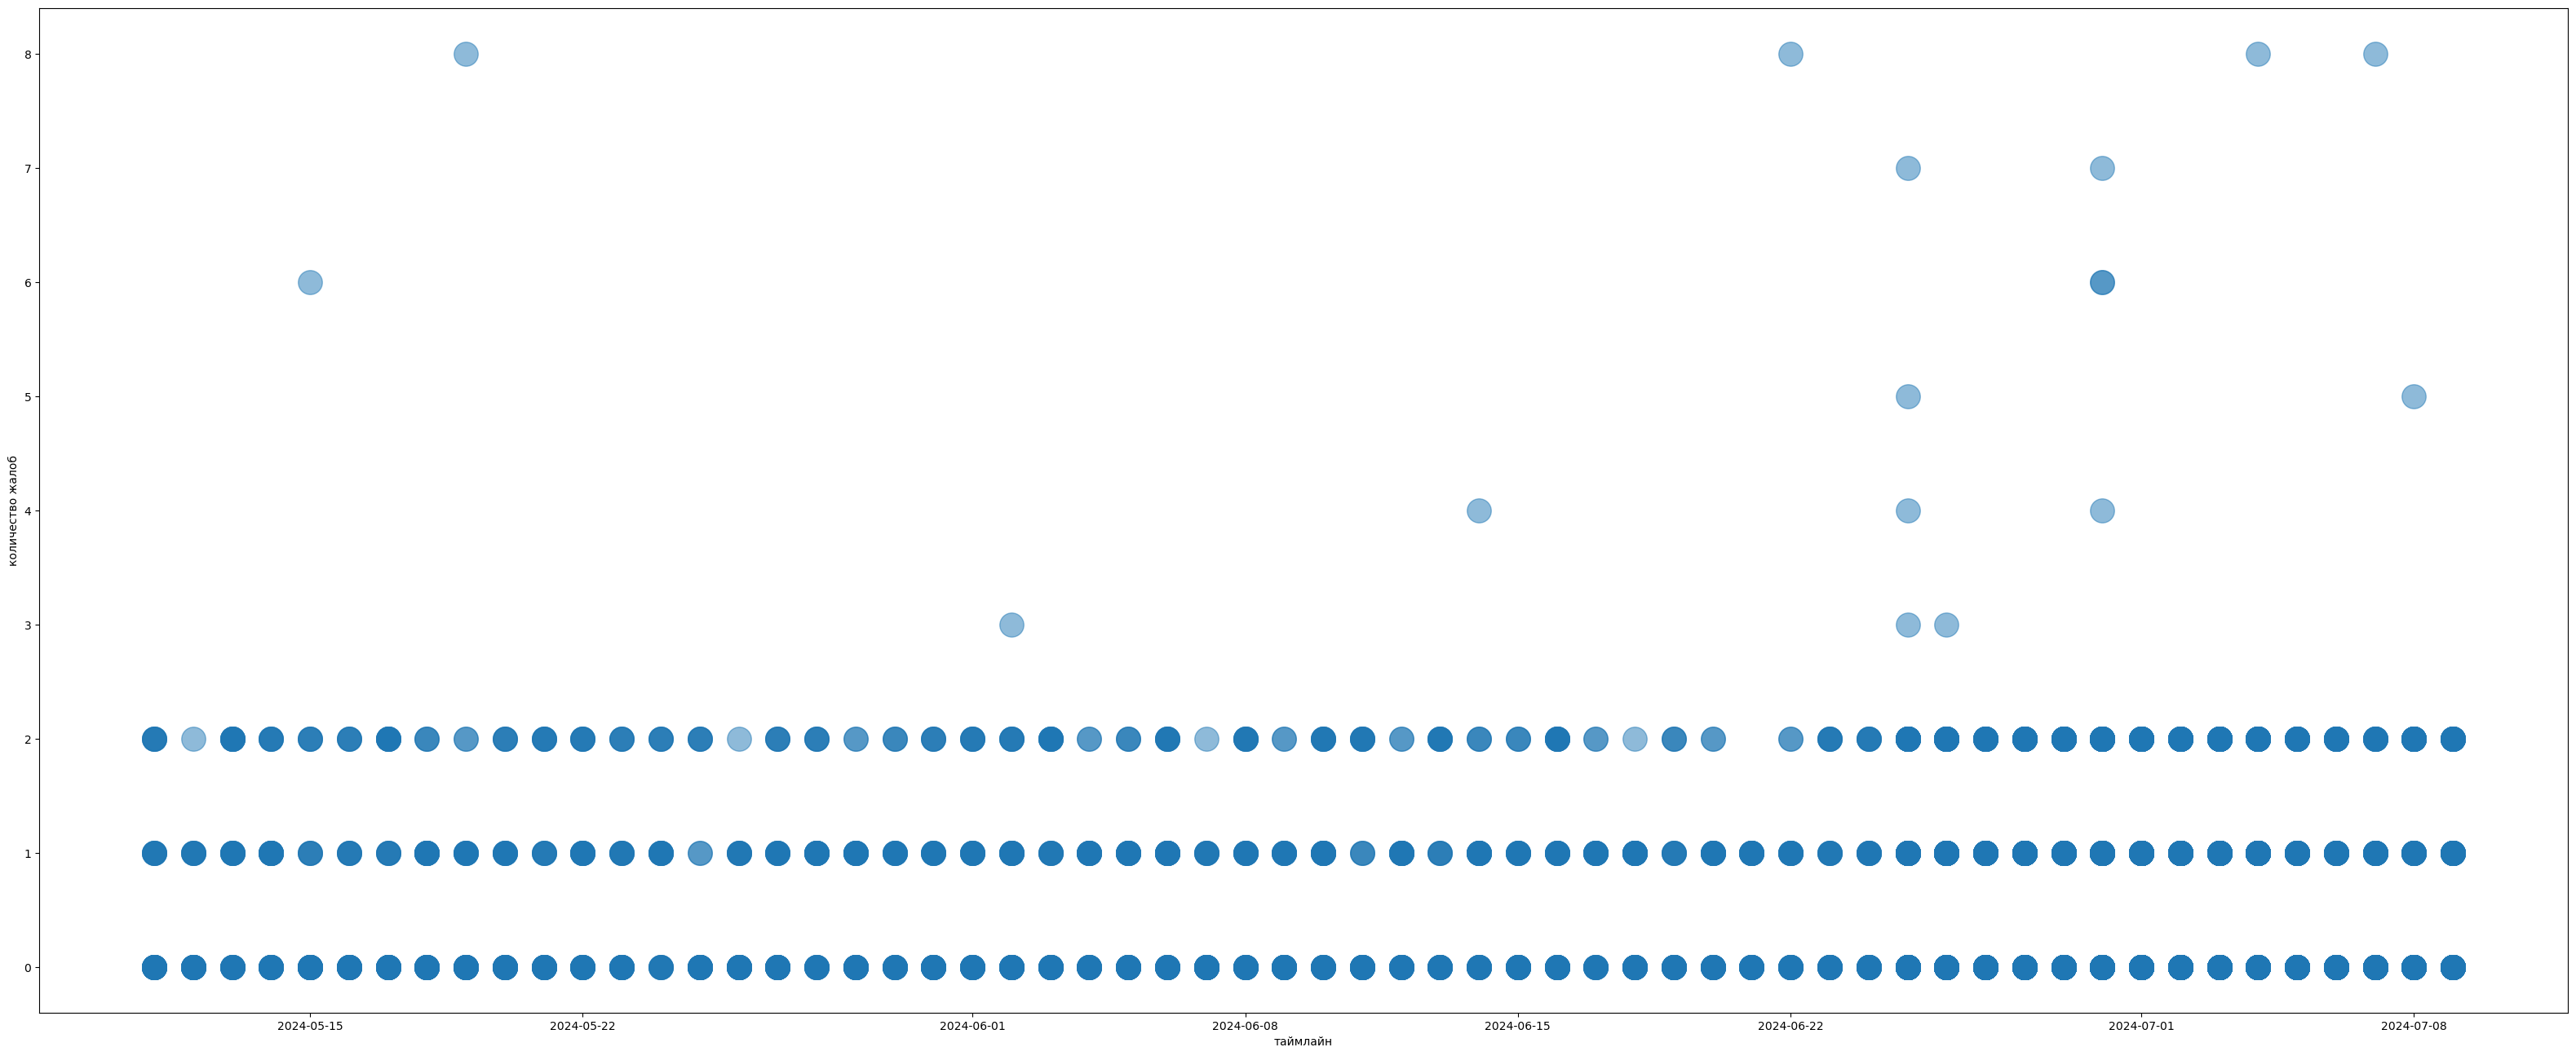

In [711]:
interactiondata = interactiondata.sort_values(by='last_order_dt')
# interactiondata
plt.figure(figsize=(40,16))
plt.scatter(interactiondata['last_order_dt'], interactiondata['complain_count'], alpha=0.5, s=450)
plt.xlabel('таймлайн')
plt.ylabel('количество жалоб')

# plt.show()
plt.savefig('complains.jpg')
# interactiondata.plot.scatter(x = 'last_order_dt', y = 'complain_count', linewidths= 4, alpha=0.5)
# interactiondata

In [267]:
# plt.figure(figsize=(12, 6))
# plt.plot(interactiondata['last_order_dt'], interactiondata['order_count'], marker='o', linestyle='-')
# plt.xlabel('Дата')
# plt.ylabel('Количество заказов')
# plt.title('Количество заказов в день')
# plt.grid(True)
# plt.show()

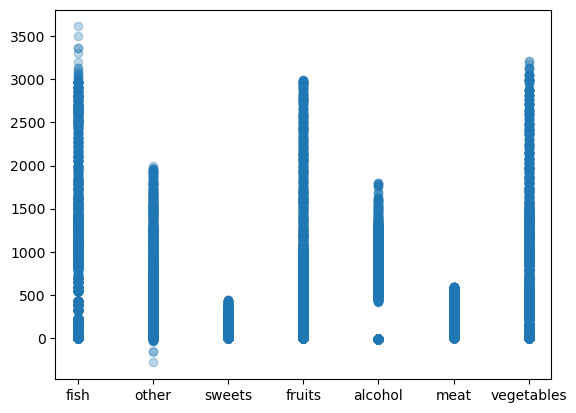

In [191]:
x = orderdata['category']
y = orderdata['avg_bill']
plt.scatter(x,y,alpha=0.3)
plt.show()

In [281]:
# neg_orderdata = orderdata[orderdata['avg_bill'] < 0]
# x = neg_orderdata['category']
# y = neg_orderdata['avg_bill']
# plt.scatter(x,y,alpha=0.3)
# plt.show()

In [277]:
# neg_orderdata = orderdata[orderdata['avg_bill'] < 0]
# x = neg_orderdata['category']
# y = neg_orderdata['avg_bill']
# plt.scatter(x,y,alpha=0.3)
# plt.show()

In [279]:
cleaned_userdata = pd.read_csv('cleaned_userdata.csv')
cleaned_orderdata = pd.read_csv('cleaned_orderdata.csv')
cleaned_interactiondata = pd.read_csv('cleaned_interactiondata.csv')

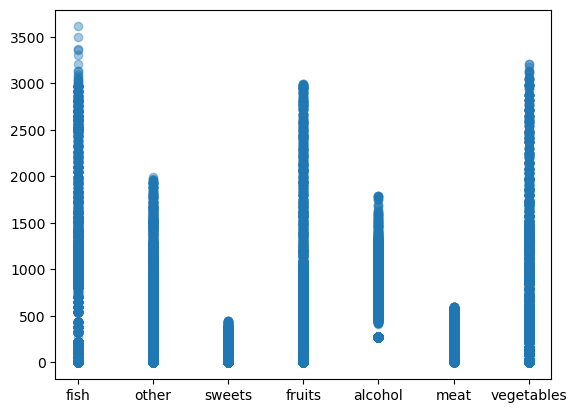

In [287]:
x = cleaned_orderdata['category']
y = cleaned_orderdata['avg_bill']
plt.scatter(x,y,alpha=0.4)
plt.show()

In [289]:
cleaned_orderdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23835 entries, 0 to 23834
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   userId    23835 non-null  object 
 1   category  23835 non-null  object 
 2   avg_bill  23835 non-null  float64
dtypes: float64(1), object(2)
memory usage: 558.8+ KB


In [343]:
alcohol_userId = cleaned_orderdata[cleaned_orderdata['category'] == 'alcohol']
alcohol_userId

,userId,category,avg_bill
5,0ceeb59c-a91c-4cf4-8bf8-3593f12722b9,alcohol,602.0
6,b2a565e5-c3e2-4547-b075-d4ddedcc5506,alcohol,564.0
24,7c6a5269-849b-449d-9659-d9bcdd2e3f42,alcohol,485.0
28,671e14c8-5077-4386-bbeb-a775e3a84edc,alcohol,637.0
35,cf6ca4a2-f9f0-45c9-b0e1-1eb2fc2461fb,alcohol,1057.0
...,...,...,...
23762,ca6242b7-aab6-4f1b-8a0f-661a6c44f69f,alcohol,654.0
23765,f14e74f9-3658-472d-9ace-6cd053a8d191,alcohol,720.0
23766,ca59606d-9079-4d80-8e36-e1068b51d9c3,alcohol,277.0
23817,e0a0f420-b8ea-42f1-a45d-7304d7eec3c3,alcohol,277.0


In [544]:
age_interactiondata = pd.read_csv('age_interactiondata.csv', delimiter=';')
age_interactiondata.head()

,userId,category,avg_bill,age
0,2c6336a2-852b-48af-9150-9b9030387f5d,fish,432.0,49
1,1085e67c-3c4e-4903-b3e9-16631132c655,other,620.0,57
2,99792dfd-8c62-4903-92b2-a83dfd392cb1,sweets,233.0,50
3,ad50b3da-da8d-4b35-92c3-79cf83c2250a,fish,594.0,64
4,a300c8a3-6280-4a59-8c89-be4212a4eb26,fruits,0.0,58


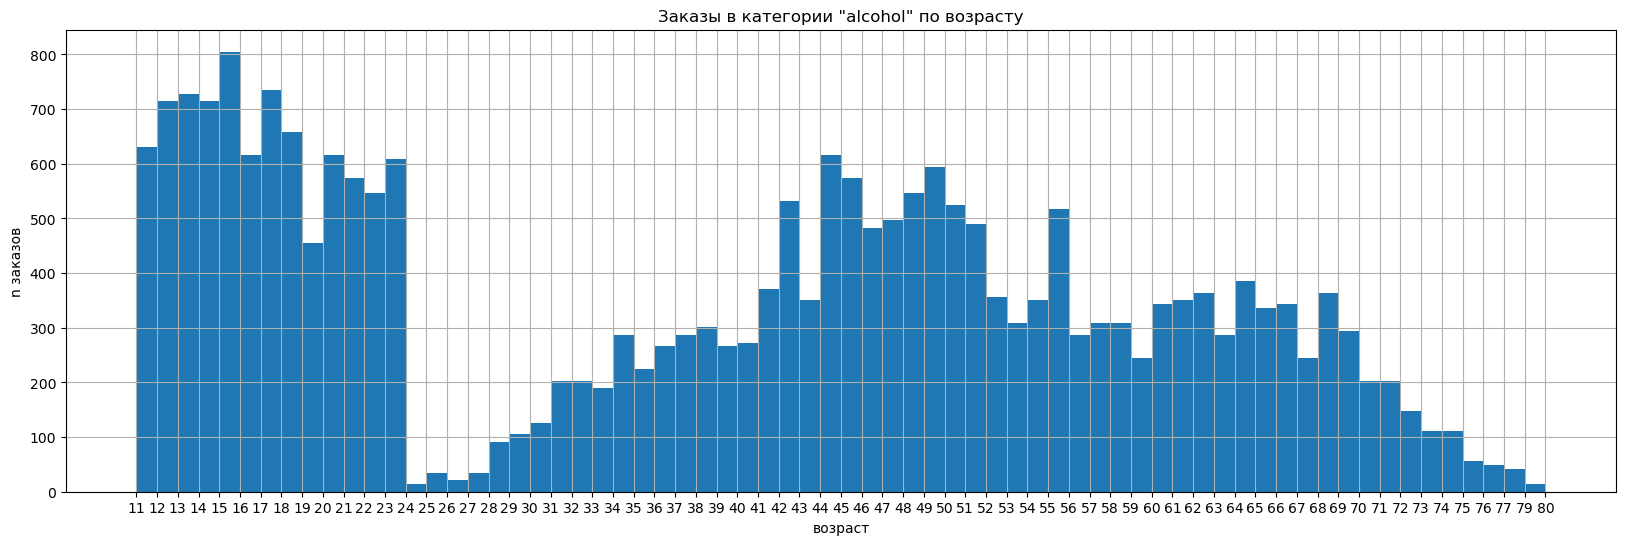

In [577]:
alcohol_age = age_interactiondata[age_interactiondata['category'] == 'alcohol']
alcohol_age = age_interactiondata[age_interactiondata['age'] <= 80]

alcohol_age = alcohol_age.sort_values(by='age')
alcohol_age['age'] = alcohol_age['age'].apply(lambda x: str(x))

plt.figure(figsize=(20, 6))
plt.grid(True)
plt.xlabel('возраст')
plt.ylabel('n заказов')
# plt.bins(40)
plt.title('Заказы в категории "alcohol" по возрасту')
x = alcohol_age['age']
x.hist(bins=68)
plt.savefig('alcohol.jpg')

In [582]:
# # plt.figure(figsize=(32,50))
# axs = cleaned_interactiondata.plot.area(figsize=(60, 60), subplots=True)
# axs


In [584]:

# plt.figure(figsize=(12,6))
# x = cleaned_userdata['age']
# y = cleaned_userdata['income'] 
# plt.xlabel('Возраст')
# plt.ylabel('Заработная плата')
# plt.title('Платёжеспособность пользователя в зависимости от возраста')
# plt.scatter(x,y,alpha=0.17)
# plt.savefig('payability.jpg')
# plt.show()

In [671]:
marketing_companies_efficiency = cleaned_interactiondata[[
    'last_order_dt',
    'marketing_company_outcome_1',
    'marketing_company_outcome_2',
    'marketing_company_outcome_3',
    'marketing_company_outcome_4',
    'marketing_company_outcome_5']].sort_values(by='last_order_dt')

marketing_companies_efficiency.last_order_dt = pd.to_datetime(marketing_companies_efficiency.last_order_dt)
# marketing_companies_efficiency.set_index('last_order_dt', inplace=True)


<Axes: >

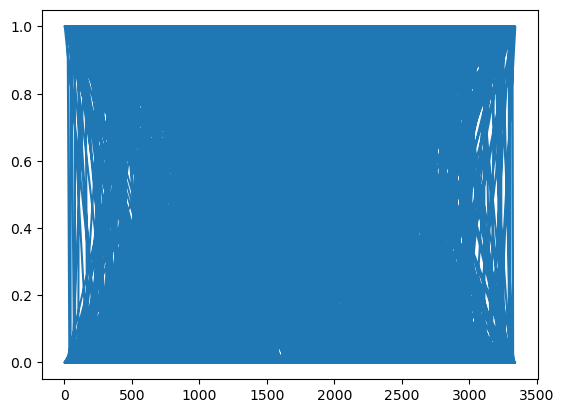

In [689]:
marketing_companies_efficiency['total_efficiency'] = (
    marketing_companies_efficiency['marketing_company_outcome_1'] |
    marketing_companies_efficiency['marketing_company_outcome_2'] |
    marketing_companies_efficiency['marketing_company_outcome_3'] |
    marketing_companies_efficiency['marketing_company_outcome_4'] |
    marketing_companies_efficiency['marketing_company_outcome_5'])
# x=marketing_companies_efficiency['last_order_dt']
# y=marketing_companies_efficiency['total_efficiency']
marketing_companies_efficiency['total_efficiency'].plot()